In [42]:
#60180520 박선진
import datetime
from scipy import stats
import io
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
import seaborn as sns

In [43]:
#데이터 불러오기

train = pd.read_csv("train.csv") 
weather_jinju = pd.read_csv ("weather_jinju.csv")
humidity_jinju = pd.read_csv("humidity_jinju.csv")
train.rename(columns={'일자' : 'date'}, inplace=True)



In [44]:
#날씨 습도 조인 >> train 조인 
weather = pd.merge(left = weather_jinju , right = humidity_jinju, on = "date", how = 'inner')
train_weather = pd.merge(left = train, right=weather, on="date", how='inner')

train_weather = train_weather.astype({'avg':'float'})
train_weather = train_weather.astype({'min':'float'})
train_weather = train_weather.astype({'max':'float'})


train_weather = train_weather.astype({'humidity':'float'})

train_weather.isnull().sum()

date              0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
Unnamed: 0_x      0
avg               0
max               0
min               0
rain              0
Unnamed: 0_y      0
humidity          0
dtype: int64

In [45]:
train_weather.head()

,date,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,Unnamed: 0_x,avg,max,min,rain,Unnamed: 0_y,humidity
0,2017-01-02,월,2697,96,102,272,0.0,모닝롤/마늘빵 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 냉이된장국 콩...,쌀밥/잡곡밥 (쌀:국내산) 사골떡국 쇠고기낙지볶음 부추깻잎전 통도라지구이 포...,쌀밥/잡곡밥 (쌀:국내산) 매운오징어국 목살간장조림 두부부침 시래기조림 포기...,1273.0,559.0,367,4.4,14.3,-1.8,0.0,384,72.8
1,2017-01-02,월,2697,96,102,272,0.0,모닝롤/마늘빵 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 냉이된장국 콩...,쌀밥/잡곡밥 (쌀:국내산) 사골떡국 쇠고기낙지볶음 부추깻잎전 통도라지구이 포...,쌀밥/잡곡밥 (쌀:국내산) 매운오징어국 목살간장조림 두부부침 시래기조림 포기...,1273.0,559.0,367,4.4,14.3,-1.8,0.0,385,37.9
2,2017-01-02,월,2697,96,102,272,0.0,모닝롤/마늘빵 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 냉이된장국 콩...,쌀밥/잡곡밥 (쌀:국내산) 사골떡국 쇠고기낙지볶음 부추깻잎전 통도라지구이 포...,쌀밥/잡곡밥 (쌀:국내산) 매운오징어국 목살간장조림 두부부침 시래기조림 포기...,1273.0,559.0,367,4.4,14.3,-1.8,0.0,386,50.6
3,2017-01-02,월,2697,96,102,272,0.0,모닝롤/마늘빵 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 냉이된장국 콩...,쌀밥/잡곡밥 (쌀:국내산) 사골떡국 쇠고기낙지볶음 부추깻잎전 통도라지구이 포...,쌀밥/잡곡밥 (쌀:국내산) 매운오징어국 목살간장조림 두부부침 시래기조림 포기...,1273.0,559.0,367,4.4,14.3,-1.8,0.0,387,58.8
4,2017-01-02,월,2697,96,102,272,0.0,모닝롤/마늘빵 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 냉이된장국 콩...,쌀밥/잡곡밥 (쌀:국내산) 사골떡국 쇠고기낙지볶음 부추깻잎전 통도라지구이 포...,쌀밥/잡곡밥 (쌀:국내산) 매운오징어국 목살간장조림 두부부침 시래기조림 포기...,1273.0,559.0,367,4.4,14.3,-1.8,0.0,388,49.6


In [71]:
train_weather["sad"]=(0.81*train_weather['avg'])+(0.01*train_weather['humidity']*(0.99*(train_weather['avg']-14.3))) + 46.3
train_weather.head()
#(1.8*train_weather['avg']-0.55*(1-train_weather['humidity'])*(1.8*train_weather['avg']-26)+32).max()

,date,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,Unnamed: 0_x,avg,max,min,rain,Unnamed: 0_y,humidity,sad
0,2017-01-02,월,2697.0,96.0,102.0,272.0,0.0,모닝롤/마늘빵 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 냉이된장국 콩...,쌀밥/잡곡밥 (쌀:국내산) 사골떡국 쇠고기낙지볶음 부추깻잎전 통도라지구이 포...,쌀밥/잡곡밥 (쌀:국내산) 매운오징어국 목살간장조림 두부부침 시래기조림 포기...,1273.0,559.0,367.0,4.4,14.3,-1.8,0.0,384.0,72.8,42.728872
1,2017-01-02,월,2697.0,96.0,102.0,272.0,0.0,모닝롤/마늘빵 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 냉이된장국 콩...,쌀밥/잡곡밥 (쌀:국내산) 사골떡국 쇠고기낙지볶음 부추깻잎전 통도라지구이 포...,쌀밥/잡곡밥 (쌀:국내산) 매운오징어국 목살간장조림 두부부침 시래기조림 포기...,1273.0,559.0,367.0,4.4,14.3,-1.8,0.0,385.0,37.9,46.149421
2,2017-01-02,월,2697.0,96.0,102.0,272.0,0.0,모닝롤/마늘빵 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 냉이된장국 콩...,쌀밥/잡곡밥 (쌀:국내산) 사골떡국 쇠고기낙지볶음 부추깻잎전 통도라지구이 포...,쌀밥/잡곡밥 (쌀:국내산) 매운오징어국 목살간장조림 두부부침 시래기조림 포기...,1273.0,559.0,367.0,4.4,14.3,-1.8,0.0,386.0,50.6,44.904694
3,2017-01-02,월,2697.0,96.0,102.0,272.0,0.0,모닝롤/마늘빵 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 냉이된장국 콩...,쌀밥/잡곡밥 (쌀:국내산) 사골떡국 쇠고기낙지볶음 부추깻잎전 통도라지구이 포...,쌀밥/잡곡밥 (쌀:국내산) 매운오징어국 목살간장조림 두부부침 시래기조림 포기...,1273.0,559.0,367.0,4.4,14.3,-1.8,0.0,387.0,58.8,44.101012
4,2017-01-02,월,2697.0,96.0,102.0,272.0,0.0,모닝롤/마늘빵 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 냉이된장국 콩...,쌀밥/잡곡밥 (쌀:국내산) 사골떡국 쇠고기낙지볶음 부추깻잎전 통도라지구이 포...,쌀밥/잡곡밥 (쌀:국내산) 매운오징어국 목살간장조림 두부부침 시래기조림 포기...,1273.0,559.0,367.0,4.4,14.3,-1.8,0.0,388.0,49.6,45.002704


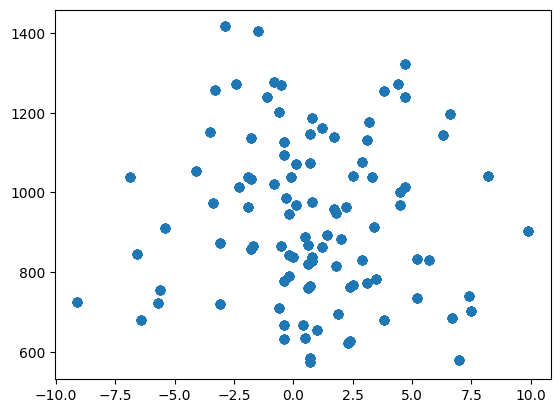

In [48]:
# 하루 평균 온도 중식계 산점도

plt.scatter(train_weather['avg'] ,train_weather["중식계"])

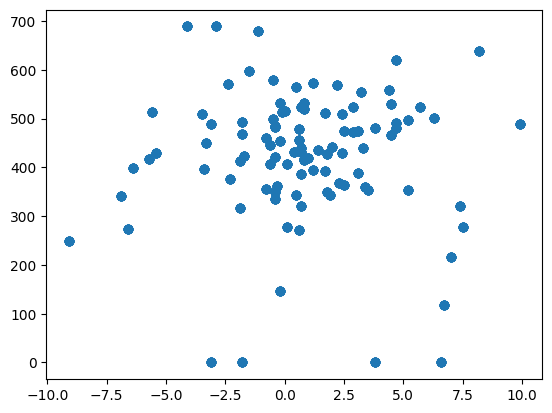

In [49]:
# 하루 평균 온도 석식계 산점도

plt.scatter(train_weather['avg'] ,train_weather["석식계"])

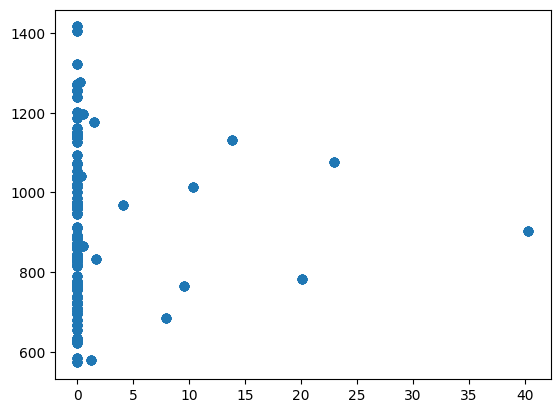

In [50]:
# 비와 중식계 산점도


plt.scatter(train_weather['rain'] ,train_weather["중식계"])

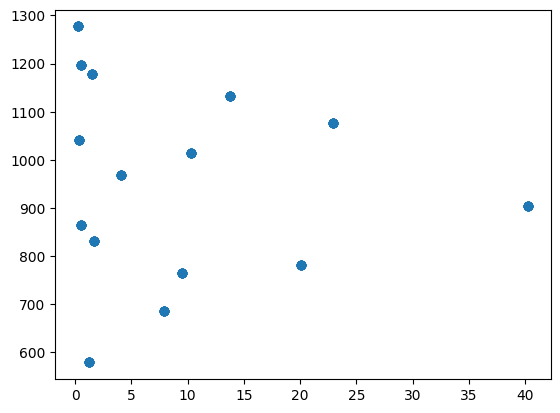

In [51]:
a = train_weather[train_weather['rain'] >0]

plt.scatter(a['rain'] ,a["중식계"])

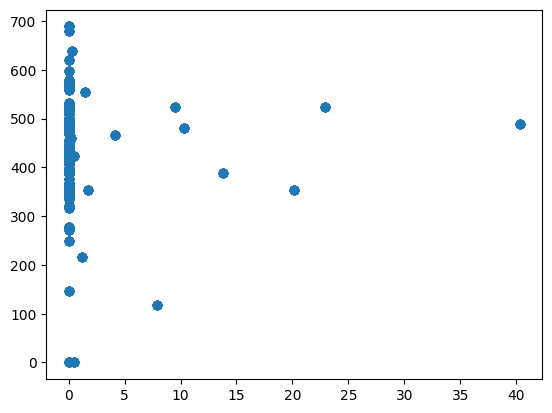

In [52]:
# 비와 석식계 산점도

plt.scatter(train_weather['rain'] ,train_weather["석식계"])

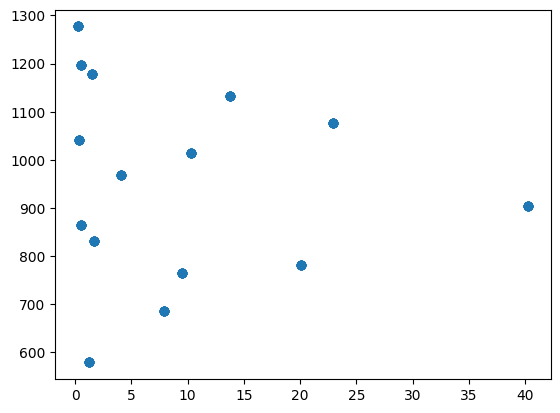

In [53]:
plt.scatter(a['rain'] ,a["중식계"])

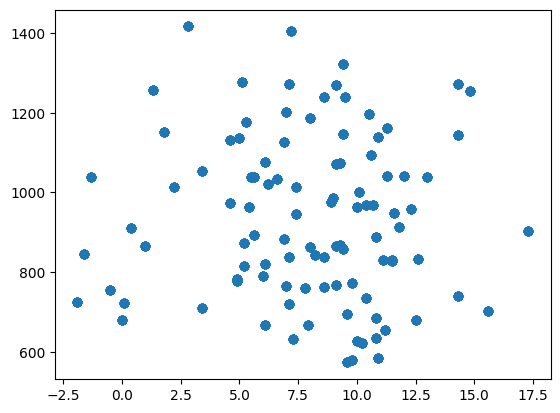

In [54]:
#  최고 기온과 중식계 산점도

plt.scatter(train_weather['max'] ,train_weather["중식계"])

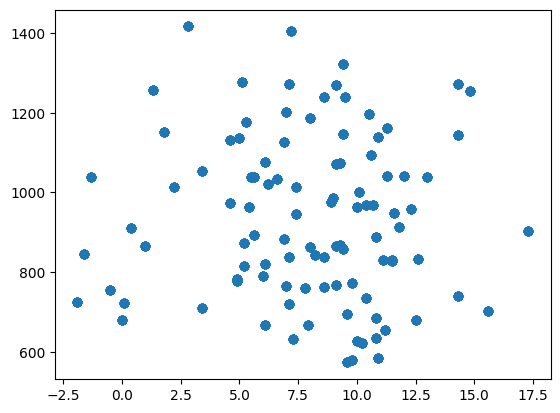

In [55]:
#  최고 기온과 중식계 산점도

plt.scatter(train_weather['max'] ,train_weather["중식계"])

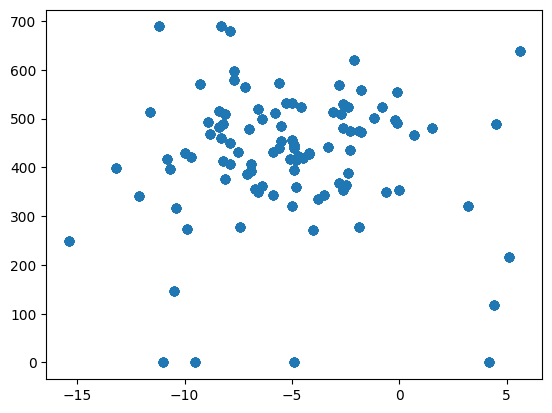

In [56]:
# 최저 기온과 석식계 산점도


plt.scatter(train_weather['min'] ,train_weather["석식계"])

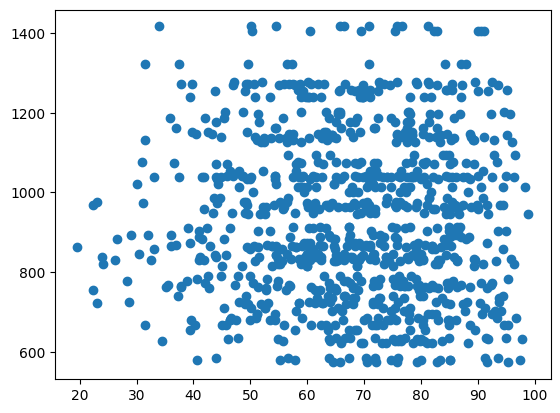

In [57]:
# 습도와 중식계 산점도


plt.scatter(train_weather['humidity'] ,train_weather["중식계"])

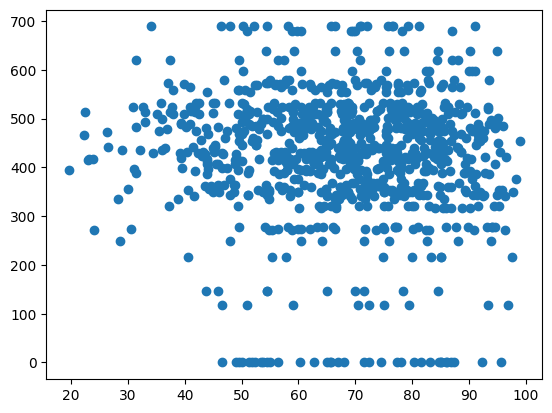

In [58]:
# 습도와 석식계 산점도


plt.scatter(train_weather['humidity'] ,train_weather["석식계"])

In [59]:
#습도와 중식계 사이의 피어슨 상관계수 

stats.pearsonr(train_weather['humidity'] ,train_weather["중식계"])

PearsonRResult(statistic=-0.026076015133416477, pvalue=0.4323164701266246)

In [60]:
#습도와 석식계 사이의 피어슨 상관계수 

stats.pearsonr(train_weather['humidity'] ,train_weather["석식계"])

PearsonRResult(statistic=-0.05725286834010677, pvalue=0.08449275996631593)

In [61]:
#최고 기온과 중식계 사이의 피어슨 상관계수 

stats.pearsonr(train_weather['max'] ,train_weather["중식계"])

PearsonRResult(statistic=-0.02458694115567815, pvalue=0.45907005302990395)

In [62]:
#최고 기온과 석식계 사이의 피어슨 상관계수 

stats.pearsonr(train_weather['max'] ,train_weather["석식계"])

PearsonRResult(statistic=0.008222072642776313, pvalue=0.8044783414621344)

In [63]:
#평균 기온과 석식계 사이의 피어슨 상관계수 

stats.pearsonr(train_weather['avg'] ,train_weather["중식계"])

PearsonRResult(statistic=-0.037592863043477566, pvalue=0.257528737783138)

In [64]:
#평균 기온과 중식계 사이의 피어슨 상관계수 

stats.pearsonr(train_weather['avg'] ,train_weather["석식계"])

PearsonRResult(statistic=-0.013931138543448952, pvalue=0.6748792261008245)

In [65]:
#최저 기온과 중식계 사이의 피어슨 상관계수
# pvalue=0.04 상당히 관련 있을것으로 예상


stats.pearsonr(train_weather['min'] ,train_weather["중식계"])

PearsonRResult(statistic=-0.0663041197156079, pvalue=0.0456632105399518)

In [66]:
#최저 기온과 석식계 사이의 피어슨 상관계수

stats.pearsonr(train_weather['min'] ,train_weather["석식계"])

PearsonRResult(statistic=-0.0019840291723727532, pvalue=0.9523663066032823)

In [67]:
#강수와 중식계 사이의 피어슨 상관계수

stats.pearsonr(train_weather['rain'] ,train_weather["중식계"])

PearsonRResult(statistic=-0.0084983848208571, pvalue=0.7980472151458167)

In [68]:
#강수와 중식계 사이의 피어슨 상관계수

stats.pearsonr(train_weather['rain'] ,train_weather["석식계"])

PearsonRResult(statistic=0.02671568165723091, pvalue=0.4211064826132541)

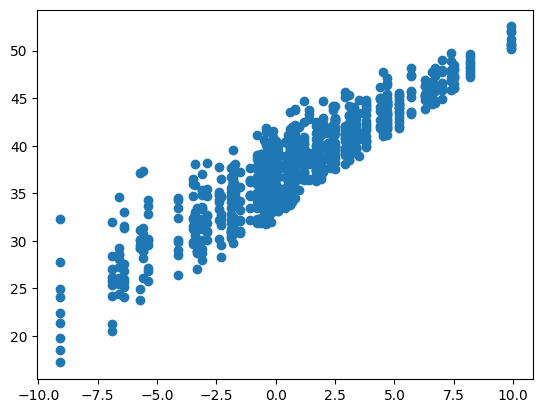

In [72]:
plt.scatter(train_weather['avg'] ,train_weather["sad"])

In [83]:
train_weather['sad'].isna().value_counts()

False    909
True       1
Name: sad, dtype: int64

In [84]:
train_weather['sad'] = train_weather['sad'].fillna(0)

In [87]:
train_weather['sad']

0      42.728872
1      46.149421
2      44.904694
3      44.101012
4      45.002704
         ...    
905    42.684376
906    42.779416
907    41.981080
908    43.169080
sad     0.000000
Name: sad, Length: 910, dtype: float64

In [97]:
train_weather["중식계"] = train_weather["중식계"].fillna(0)
train_weather["석식계"] = train_weather["석식계"].fillna(0)

In [100]:
from scipy import stats
stats.normaltest(train_weather["중식계"])

NormaltestResult(statistic=13.570883701633072, pvalue=0.0011301082540337664)

In [101]:
from scipy import stats
stats.normaltest(train_weather["석식계"])

NormaltestResult(statistic=190.080882552818, pvalue=5.302257267097062e-42)

In [98]:
stats.pearsonr(train_weather['sad'] ,train_weather["중식계"])

PearsonRResult(statistic=0.003596588996319105, pvalue=0.913720703636017)

In [99]:
stats.pearsonr(train_weather['sad'] ,train_weather["석식계"])

PearsonRResult(statistic=0.028597967198397665, pvalue=0.38886217598314066)

In [105]:
stats.ttest_ind(train_weather['sad'] ,train_weather["석식계"],equal_var=False)

Ttest_indResult(statistic=-86.37807316307128, pvalue=0.0)

In [106]:
stats.ttest_ind(train_weather['sad'] ,train_weather["석식계"],equal_var=True)

Ttest_indResult(statistic=-86.37807316307128, pvalue=0.0)

In [107]:
stats.ttest_ind(train_weather['sad'] ,train_weather["중식계"],equal_var=False)

Ttest_indResult(statistic=-130.80604247399268, pvalue=0.0)

In [113]:
stats.ttest_ind(train_weather['sad'] ,train_weather["중식계"],equal_var=True)

Ttest_indResult(statistic=-130.80604247399268, pvalue=0.0)

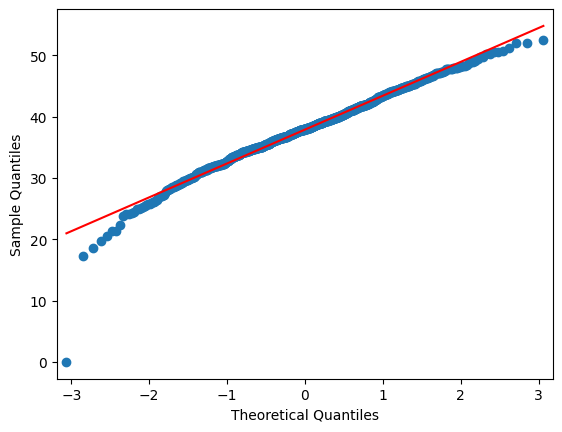

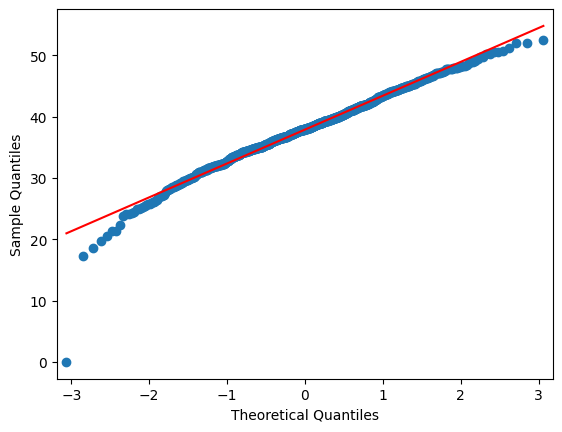

In [119]:
from statsmodels.graphics.gofplots import qqplot

qqplot(train_weather['sad'], line='s')